In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [96]:
#reading the csv file into a dataframe
df = pd.read_csv('PreprocessedDataset.csv')

#displaying the first 5 rows of the dataframe
df.head()

,Unnamed: 0,category,rating,label,text_
0,0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort love itveri pretti
1,1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin ive mine coupl year
2,2,Home_and_Kitchen_5,5.0,CG,pillow save back love look feel pillow
3,3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price
4,4,Home_and_Kitchen_5,5.0,CG,nice set good qualiti set two month


In [97]:
#To remove a column whose name is 'unnamed: 0', axis specifies that it is a column(value-1) or row(value-0), inplace specifies to modify the given dataframe(value-True) or return a new dataframe 
df.drop('Unnamed: 0',axis=1,inplace=True)

In [98]:
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort love itveri pretti
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin ive mine coupl year
2,Home_and_Kitchen_5,5.0,CG,pillow save back love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price
4,Home_and_Kitchen_5,5.0,CG,nice set good qualiti set two month


In [99]:
#Remove rows containing missing values(NAN) from df
df.dropna(inplace=True)

In [100]:
#Adds a new column named 'length' to df. Extracts the column named 'text_' and calculates the length of each element(including spaces) in the column
df['length'] = df['text_'].apply(len)

In [101]:
df.head()

,category,rating,label,text_,length
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort love itveri pretti,48
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin ive mine coupl year,44
2,Home_and_Kitchen_5,5.0,CG,pillow save back love look feel pillow,38
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price,35
4,Home_and_Kitchen_5,5.0,CG,nice set good qualiti set two month,35


In [102]:
#Provides concise summary of the dataframe (column names, no of values in each column, datatype of each column)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40431 entries, 0 to 40431
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40431 non-null  object 
 1   rating    40431 non-null  float64
 2   label     40431 non-null  object 
 3   text_     40431 non-null  object 
 4   length    40431 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 1.9+ MB


In [103]:
#Group a dataframe by one or more columns and generate a description of each group(label)
df.groupby('label').describe()

rating                                                length  \
         count      mean       std  min  25%  50%  75%  max    count   
label                                                                  
CG     20215.0  4.259906  1.141092  1.0  4.0  5.0  5.0  5.0  20215.0   
OR     20216.0  4.253265  1.147652  1.0  4.0  5.0  5.0  5.0  20216.0   

                                                                
             mean         std  min   25%    50%    75%     max  
label                                                           
CG     154.064853  155.188872  4.0  51.0   88.0  192.0  1191.0  
OR     219.036555  233.241388  8.0  68.0  123.0  272.0  1866.0

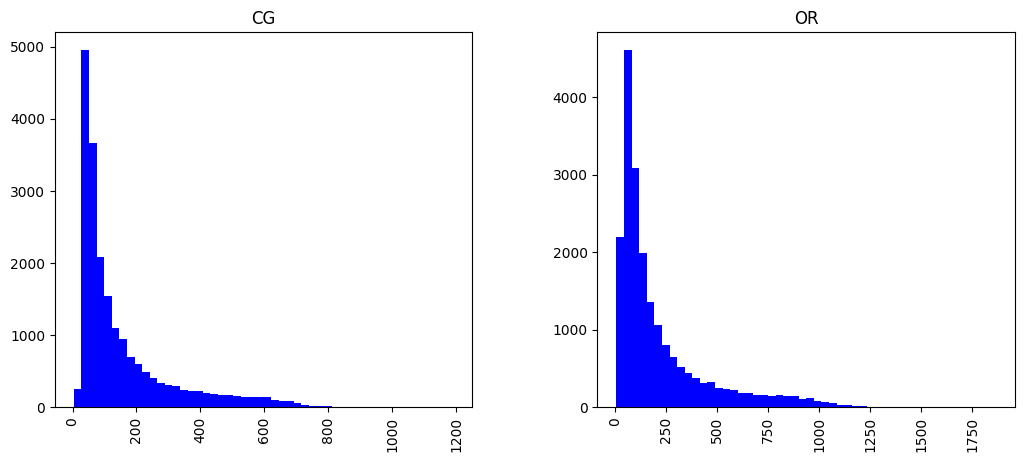

In [104]:
#Histogram of each label separately
df.hist(column='length',by='label',bins=50,color='blue',figsize=(12,5))
plt.show()

### CountVectorizer Bag of Words Transformer

In [105]:
#CountVectorizer converts a collection of text documents to a matrix of token counts.
#The matrix represents the frequency of words(tokens) in each document(instance of text column)

#Creating an instance of CountVectorizer
bow_transformer = CountVectorizer()
bow_transformer

CountVectorizer()

In [106]:
#Fitting the CountVectorizer on the text documents.
#It analyzes the text data and builds the vocabulary(consisting of unique words that appears in the text column)
bow_transformer.fit(df['text_'])

#Prints the total no of unique words in the vocabulary
print("Total Vocabulary:",len(bow_transformer.vocabulary_))

Total Vocabulary: 36392


In [107]:
#Here first we try transforming the 4th review 
review4 = df['text_'][3]
review4

'miss inform use great product price'

In [108]:
# Here we are transforming the 'review4' into bag-of-words representation.
bow_msg4 = bow_transformer.transform([review4])
# The 'bow_msg4' is a sparse matrix with each row corresponing to the document and each column corresponding to a unique word in the vocabulary.
print(bow_msg4)
# Prints the ( no of documents(rows) , no of unique words in the vocabulary)
print(bow_msg4.shape)

  (0, 13879)	1
  (0, 16453)	1
  (0, 20729)	1
  (0, 25021)	1
  (0, 25168)	1
  (0, 33953)	1
(1, 36392)


In [109]:
# Used to retrieve the actual words from the vocabulary using specific indices
print(bow_transformer.get_feature_names_out()[16453])
print(bow_transformer.get_feature_names_out()[25021])

inform
price


In [110]:
# Transforming the entire 'text_' column into a bag-of-words matrix
bow_reviews = bow_transformer.transform(df['text_'])

In [111]:
print("Shape of Bag of Words Transformer for the entire review dataset:",bow_reviews.shape)
print("Amount of non zero values in the bag of words model:",bow_reviews.nnz)

Shape of Bag of Words Transformer for the entire review dataset: (40431, 36392)
Amount of non zero values in the bag of words model: 1009901


In [112]:
#It calculates the percenatge of the bag-of-words matrix occupied by zero values.
print("Sparsity:",np.round((bow_reviews.nnz/(bow_reviews.shape[0]*bow_reviews.shape[1]))*100,2))

Sparsity: 0.07


### TFIDF(Term Frequency-Inverse Document Frequency) Transformer

In [113]:
# It is used to transform the bag-of-words matrix into TF-IDF representation.It assigns a weight to each term in the documents based on its frequency in the document and rarity across all documents.
# IDF(w)=log(N/ df(w)) , N-> no of documents, df(t)->no of documents containing the word 'w'

# Creating and fitting the TfidfTransformer on the bag-of-words matrix. It computes the IDF values based on entire set of reviews.
tfidf_transformer = TfidfTransformer().fit(bow_reviews)

# Here, we transform the bag-of-words representation of a single document into TF-IDF using the calculated IDF values from the above line.
tfidf_rev4 = tfidf_transformer.transform(bow_msg4)
print(tfidf_rev4)

  (0, 33953)	0.2636382764691231
  (0, 25168)	0.3439070584585239
  (0, 25021)	0.3634271983933823
  (0, 20729)	0.5594411578541845
  (0, 16453)	0.5611168946583521
  (0, 13879)	0.22872885086597622


In [114]:
# To access the IDF values for a specific word in the vocabulary
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['miss']])
print(tfidf_transformer.idf_[bow_transformer.vocabulary_['price']])

5.557643374396018
3.6103864237903256


In [115]:
# Transforming the bag-of-words matrix into a TF-IDF representation. Each entry in the resulting matrix represents the TF-IDF score of a word in a document
tfidf_reviews = tfidf_transformer.transform(bow_reviews)
# Shape gives (number_of_documents, number_of_features)
print("Shape:",tfidf_reviews.shape)
# 2 dimensional as it represent the relationship between documents(rows) and words(columns).
print("No. of Dimensions:",tfidf_reviews.ndim)

Shape: (40431, 36392)
No. of Dimensions: 2


### Creating training and testing data

In [116]:
#Splits df into training and testing set
#selects text and label column. shuffles the data and divides into 35% for testing and 65% for training
review_train, review_test, label_train, label_test = train_test_split(df['text_'],df['label'],test_size=0.35)

### Naive Bayes

Naive Bayes models the probability of a document belonging to a particular class using the multinomial distribution, which counts the frequency of each feature (word) in the document. 

In [117]:
#Defining a ML Pipeline which allows to sequentially apply a list of transformers to preprocess the data and conclude with a final estimator
#Pipeline is used as it ensures that same preprocessing steps are applied consistently to both the training and testing data.
#Transformers used are 'CountVectorizer' and 'TfidfTransformer' and final estimator is 'MultinomialNB' 


pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [118]:
#Here, we are training the above defined pipeline on our training data(training the model)
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [119]:
#Using the above trained machine learning pipeline to make predictions on a test set
nb_pred = pipeline.predict(review_test)
#nb_pred contains the predicted labels for the corresponding 'review_test'
nb_pred

array(['OR', 'OR', 'CG', ..., 'CG', 'CG', 'CG'], dtype='<U2')

In [120]:
print('Classification Report:',classification_report(label_test,nb_pred))
print('Confusion Matrix:',confusion_matrix(label_test,nb_pred))
print('Accuracy Score:',accuracy_score(label_test,nb_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,nb_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.83      0.89      0.86      7095
          OR       0.88      0.82      0.85      7056

    accuracy                           0.85     14151
   macro avg       0.85      0.85      0.85     14151
weighted avg       0.85      0.85      0.85     14151

Confusion Matrix: [[6298  797]
 [1293 5763]]
Accuracy Score: 0.8523072574376369
Model Prediction Accuracy: 85.23%


In [121]:
#Classification report includes the metrics-
#Precision - It tells us that out of all the instances predicted as positive, how many were correctly identified. E.g. 0.83 for CG indicates that 83% of the instances predicted as CG are actually CG i.e. matched with 'label_test'.
#Recall -  It tells us that out of all the actual positive instances, how many did the model capture. E.g. 0.89 for CG indicates that 89% of the actual CG instances in the test set were correctly predicted.
#F1-Score - Mean of precision and recall
#Support - Represents total no of instances of each class in the test dataset.
#Accuracy gives the overall performance E.g. 0.85 indicates that the model correctly predeicted the class(label) for 85% of the instances in the test set.
#Macro avg - calculates the unweighted average of the metrics for both the classes
#Weighted avg - calculates the weighted average of the metrics (i.e. considering no of instances in each class)

#Confusion matrix gives details about correct and incorrect predictions made by the model.
# value at (1,1) is true positive i.e. no of instances correctly predicted as positive(CG) --- 6296
# value at (1,2) is false positive i.e. no of instances incorrectly predicted as positive(CG) --- 800 (false alarms)
# value at (2,1) is false negativee i.e. no of instances incorrectly predicted as negative(CG) --- 1317  (missed positive instances)
# value at (2,2) is true negative i.e. no of instances correctly predicted as negative(OR) --- 5738

#Accuracy Score - Tells us that the model correctly predicted the class for 85.04% of all the instances in the test set.

### Decision Tree

Decision Tree recursively splits the dataset into subsets based on the most significant feature to minimize impurity until a stopping criterion is met.

In [122]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier())
])

In [123]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [124]:
dtree_pred = pipeline.predict(review_test)
dtree_pred

array(['OR', 'OR', 'OR', ..., 'OR', 'CG', 'CG'], dtype=object)

In [125]:
print('Classification Report:',classification_report(label_test,dtree_pred))
print('Confusion Matrix:',confusion_matrix(label_test,dtree_pred))
print('Accuracy Score:',accuracy_score(label_test,dtree_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.74      0.76      0.75      7095
          OR       0.75      0.73      0.74      7056

    accuracy                           0.74     14151
   macro avg       0.74      0.74      0.74     14151
weighted avg       0.74      0.74      0.74     14151

Confusion Matrix: [[5369 1726]
 [1908 5148]]
Accuracy Score: 0.7431983605398912
Model Prediction Accuracy: 74.32%


### K nearest-neighbors

K-Nearest Neighbors (KNN) classifies new data points based on the majority class of their K nearest neighbors in the feature space. 

In [126]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',KNeighborsClassifier(n_neighbors=2))
])

In [127]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=2))])

In [128]:
knn_pred = pipeline.predict(review_test)
knn_pred

array(['CG', 'CG', 'CG', ..., 'CG', 'CG', 'CG'], dtype=object)

In [129]:
print('Classification Report:',classification_report(label_test,knn_pred))
print('Confusion Matrix:',confusion_matrix(label_test,knn_pred))
print('Accuracy Score:',accuracy_score(label_test,knn_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.55      0.98      0.70      7095
          OR       0.89      0.19      0.31      7056

    accuracy                           0.58     14151
   macro avg       0.72      0.58      0.51     14151
weighted avg       0.72      0.58      0.51     14151

Confusion Matrix: [[6924  171]
 [5730 1326]]
Accuracy Score: 0.582997668009328
Model Prediction Accuracy: 58.3%


### Support Vector Classifier

 Support Vector Classifier (SVC) separates data points by finding the optimal hyperplane that maximizes the margin between classes.

In [130]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [131]:
pipeline.fit(review_train, label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC())])

In [132]:
svc_pred = pipeline.predict(review_test)
svc_pred

array(['OR', 'OR', 'CG', ..., 'OR', 'CG', 'CG'], dtype=object)

In [133]:
print('Classification Report:',classification_report(label_test,svc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,svc_pred))
print('Accuracy Score:',accuracy_score(label_test,svc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.89      0.87      0.88      7095
          OR       0.88      0.90      0.89      7056

    accuracy                           0.89     14151
   macro avg       0.89      0.89      0.89     14151
weighted avg       0.89      0.89      0.89     14151

Confusion Matrix: [[6201  894]
 [ 733 6323]]
Accuracy Score: 0.8850257932301604
Model Prediction Accuracy: 88.5%


### Logistic Regression


Logistic Regression is a linear classification algorithm that models the probability of a binary outcome. It calculates the weighted sum of input features and applies a sigmoid function to produce probabilities.

In [134]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [135]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [136]:
lr_pred = pipeline.predict(review_test)
lr_pred

array(['OR', 'OR', 'CG', ..., 'OR', 'CG', 'CG'], dtype=object)

In [139]:
print('Classification Report:',classification_report(label_test,lr_pred))
print('Confusion Matrix:',confusion_matrix(label_test,lr_pred))
print('Accuracy Score:',accuracy_score(label_test,lr_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.87      0.86      0.87      7095
          OR       0.86      0.87      0.87      7056

    accuracy                           0.87     14151
   macro avg       0.87      0.87      0.87     14151
weighted avg       0.87      0.87      0.87     14151

Confusion Matrix: [[6096  999]
 [ 885 6171]]
Accuracy Score: 0.8668645325418698
Model Prediction Accuracy: 86.69%


### Random Forests Classifier


Random Forest Classifier builds multiple decision trees using bootstrapping and feature randomness. Each tree votes for class prediction, with the majority determining the final prediction. 

In [141]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [142]:
pipeline.fit(review_train,label_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [143]:
rfc_pred = pipeline.predict(review_test)
rfc_pred

array(['OR', 'OR', 'CG', ..., 'OR', 'CG', 'CG'], dtype=object)

In [144]:
print('Classification Report:',classification_report(label_test,rfc_pred))
print('Confusion Matrix:',confusion_matrix(label_test,rfc_pred))
print('Accuracy Score:',accuracy_score(label_test,rfc_pred))
print('Model Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')

Classification Report:               precision    recall  f1-score   support

          CG       0.81      0.89      0.85      7095
          OR       0.88      0.79      0.83      7056

    accuracy                           0.84     14151
   macro avg       0.84      0.84      0.84     14151
weighted avg       0.84      0.84      0.84     14151

Confusion Matrix: [[6337  758]
 [1500 5556]]
Accuracy Score: 0.8404353049254469
Model Prediction Accuracy: 84.04%


In [147]:
 print('Performance of the ML models:')
 print('\n')
 print('K Nearest Neighbors Prediction Accuracy:',str(np.round(accuracy_score(label_test,knn_pred)*100,2)) + '%')
 print('Decision Tree Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,dtree_pred)*100,2)) + '%')
 print('Multinomial Naive Bayes Prediction Accuracy:',str(np.round(accuracy_score(label_test,nb_pred)*100,2)) + '%')
 print('Logistic Regression Prediction Accuracy:',str(np.round(accuracy_score(label_test,lr_pred)*100,2)) + '%')
 print('Random Forests Classifier Prediction Accuracy:',str(np.round(accuracy_score(label_test,rfc_pred)*100,2)) + '%')
print('Support Vector Machines Prediction Accuracy:',str(np.round(accuracy_score(label_test,svc_pred)*100,2)) + '%')

Performance of the ML models:


K Nearest Neighbors Prediction Accuracy: 58.3%
Decision Tree Classifier Prediction Accuracy: 74.32%
Multinomial Naive Bayes Prediction Accuracy: 85.23%
Logistic Regression Prediction Accuracy: 86.69%
Random Forests Classifier Prediction Accuracy: 84.04%
Support Vector Machines Prediction Accuracy: 88.5%
